In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
#Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import matplotlib.dates as mdates
# Usar "Shift+Enter" para procesar la información de la celda
#!pip install -U seaborn

In [2]:
#El primer renglón trae los nombres de las variables, y en el segundo renglón vienen las unidades 
#en las que se miden estas variables. Trabajaremos sólo con los datos del año 2009. 

#Leemos el archivo en excel con los datos meteorológicos de Nogales.
df0 = pd.read_excel('nogal.xlsx')
#Imprimimos el Data frame.head para ver la distribución de los 5 primeros datos.
df0.head()

,DATE,TIME,N,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2009-01-01,00:10:00,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,00:20:00,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,00:30:00,1.0,NaN,1.227,0.685,-0.069,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,00:40:00,1.0,NaN,1.135,0.741,-0.093,9.80,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,00:50:00,1.0,NaN,0.755,1.064,-0.149,8.87,1.332,-184.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Eliminamos las columnas que no contienen datos y creamos un nuevo Dataframe.
df1 = df0.drop(df0.columns[df0.columns.str.contains('unnamed:', case = False)], axis = 1)
#Verificamos qué tipo de variables hay en cada columna.
df1.dtypes

DATE           datetime64[ns]
TIME                   object
N                     float64
u_Avg                 float64
v_Avg                  object
w_Avg                 float64
t_Avg                 float64
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
dtype: object

In [4]:
#Creamos un la columna Fecha para la fecha y quitamos la columna de DATE
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['DATE'] , 1), dayfirst=True)
df1 = df1.drop(['DATE'], 1)

In [5]:
#Mostramos el nuevo Dataframe 
df1.head()

,TIME,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,00:10:00,1.0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000,2009-01-01
1,00:20:00,1.0,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000,2009-01-01
2,00:30:00,1.0,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01
3,00:40:00,1.0,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000,2009-01-01
4,00:50:00,1.0,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000,2009-01-01


In [6]:
#Ahora comprobamos si la columna FECHA es una variable de tiempo.
df1.dtypes

TIME                   object
N                     float64
u_Avg                 float64
v_Avg                  object
w_Avg                 float64
t_Avg                 float64
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
FECHA          datetime64[ns]
dtype: object

In [7]:
#Declaramos una variable para las columnas:
Rows = {"N","u_Avg","v_Avg","w_Avg","t_Avg","kh20_Avg","net_rad_Avg","shf1_Avg","shf2_Avg","vv_Avg","airT_Avg","rh_Avg","e_sat_Avg","e_Avg","h2o_hmp_Avg"}

#Para convertir las columnas en variables númericas float64.
for Row in Rows:
    df1[Row] = df1[Row].astype(dtype=np.float64)
    
df1.dtypes

TIME                   object
N                     float64
u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
FECHA          datetime64[ns]
dtype: object

In [8]:
#Mostramos el DataFrame para observar que sean variables numéricas.
df1.head()

,TIME,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,00:10:00,1.0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.400000,0.899,1.178,1.059,8.120000,2009-01-01
1,00:20:00,1.0,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.240000,0.896,1.166,1.045,8.020000,2009-01-01
2,00:30:00,1.0,1.227,0.685,-0.069,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01
3,00:40:00,1.0,1.135,0.741,-0.093,9.80,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737000,2009-01-01
4,00:50:00,1.0,0.755,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.630000,0.859,1.119,0.961,7.390000,2009-01-01


In [9]:
#Mostramos la correlación del DataFrame.
df1.corr()

,N,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
N,1.000000,0.020629,0.031793,0.540191,0.023786,-0.000075,-0.132426,-0.006994,-0.003209,0.463299,-0.268578,0.357670,-0.162738,0.387780,0.768532
u_Avg,0.020629,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.031793,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.540191,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.023786,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.000075,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.132426,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,-0.006994,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,-0.003209,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,0.463299,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064


In [10]:
#Llamaremos a la correlación con otra variable df.
df2 = df1.corr()

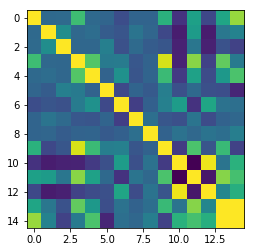

In [11]:
plt.imshow(df2)

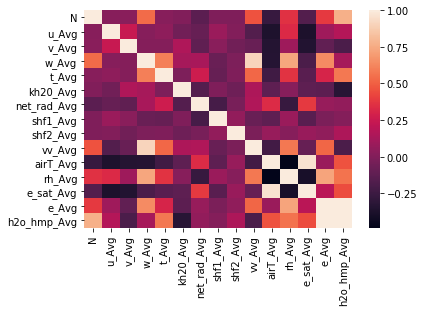

In [12]:
sns.heatmap(df2)

In [13]:
#Realizaremos una gráfica de dispersión de puntos, de variable 1 contra variable 2, para los casos donde 
#la correlación absolutasea mayor de 0.6.
#Esos casos son (N, h20_hmp_Avg), (w_Avg, t_Avg), (w_Avg, vv_Avg), (w_Avg, rh_Avg), (w_Avg, e_Avg), (t_Avg, w_Avg)
#(vv_Avg, w_Avg), (airT_Avg, e_sat_Avg), (rh_Avg, w_Avg), (rh_Avg, e_Avg), (e_sat_Avg, airT_Avg), (e_Avg, w_Avg), (e_Avg, rh_Avg)
#(e_Avg, h2o_hmp_Avg), (h2o_hmp_Avg, N), (h2o_hmp_Avg, e_Avg).

Text(0.5, 1.0, 'N vs h2o_hmp_Avg (corr=0.7685)')

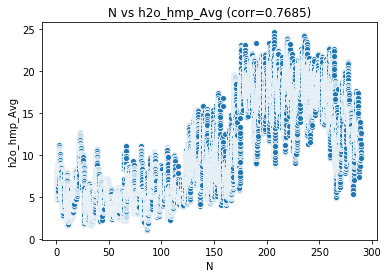

In [14]:
sns.scatterplot(x=df1["N"],y=df1["h2o_hmp_Avg"])
plt.title("N vs h2o_hmp_Avg (corr=0.7685)")

Text(0.5, 1.0, 'w_Avg vs t_Avg (corr=0.6013)')

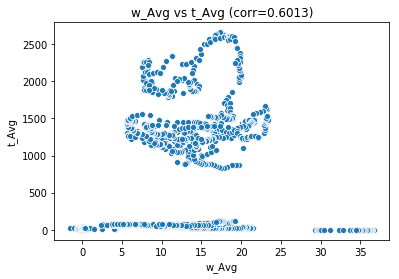

In [15]:
sns.scatterplot(x=df1["w_Avg"],y=df1["t_Avg"])
plt.title("w_Avg vs t_Avg (corr=0.6013)")

Text(0.5, 1.0, 'w_Avg vs vv_Avg (corr=0.9128)')

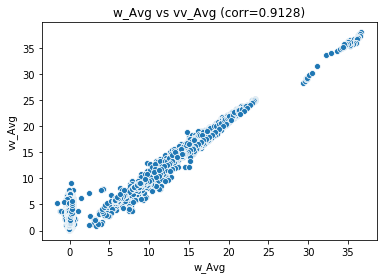

In [16]:
sns.scatterplot(x=df1["w_Avg"],y=df1["vv_Avg"])
plt.title("w_Avg vs vv_Avg (corr=0.9128)")

Text(0.5, 1.0, 'w_Avg vs rh_Avg (corr=0.7375)')

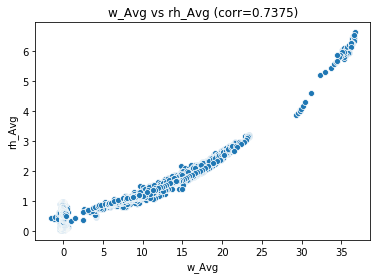

In [17]:
sns.scatterplot(x=df1["w_Avg"],y=df1["rh_Avg"])
plt.title("w_Avg vs rh_Avg (corr=0.7375)")

Text(0.5, 1.0, 'w_Avg vs e_Avg (corr=0.6463)')

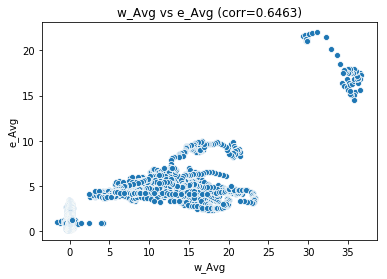

In [18]:
sns.scatterplot(x=df1["w_Avg"],y=df1["e_Avg"])
plt.title("w_Avg vs e_Avg (corr=0.6463)")

Text(0.5, 1.0, 't_Avg vs w_Avg (corr=0.6013)')

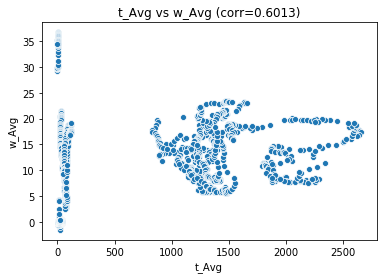

In [19]:
sns.scatterplot(x=df1["t_Avg"],y=df1["w_Avg"])
plt.title("t_Avg vs w_Avg (corr=0.6013)")

Text(0.5, 1.0, 'vv_Avg vs w_Avg (corr=0.9128)')

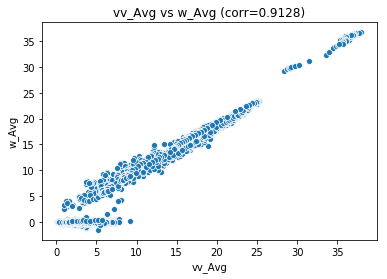

In [20]:
sns.scatterplot(x=df1["vv_Avg"],y=df1["w_Avg"])
plt.title("vv_Avg vs w_Avg (corr=0.9128)")

Text(0.5, 1.0, 'airT_Avg vs e_sat_Avg (corr=0.9644)')

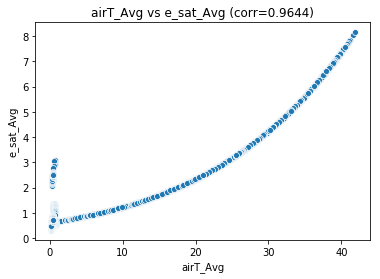

In [21]:
sns.scatterplot(x=df1["airT_Avg"],y=df1["e_sat_Avg"])
plt.title("airT_Avg vs e_sat_Avg (corr=0.9644)")

Text(0.5, 1.0, 'rh_Avg vs w_Avg (corr=0.7375)')

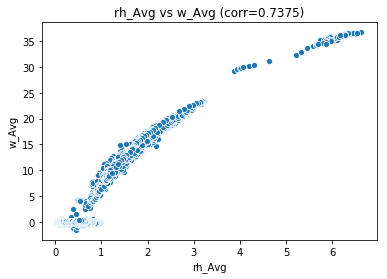

In [22]:
sns.scatterplot(x=df1["rh_Avg"],y=df1["w_Avg"])
plt.title("rh_Avg vs w_Avg (corr=0.7375)")

Text(0.5, 1.0, 'rh_Avg vs e_Avg (corr=0.7286)')

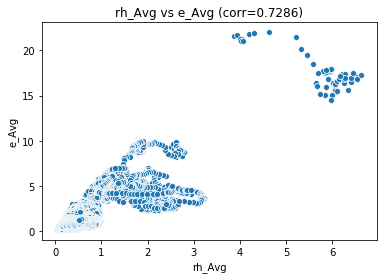

In [23]:
sns.scatterplot(x=df1["rh_Avg"],y=df1["e_Avg"])
plt.title("rh_Avg vs e_Avg (corr=0.7286)")

Text(0.5, 1.0, 'e_sat_Avg vs airT_Avg (corr=0.9644)')

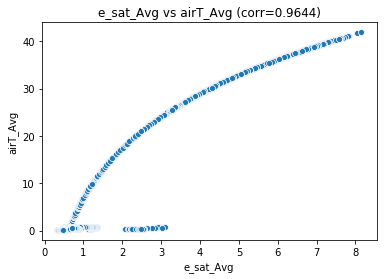

In [24]:
sns.scatterplot(x=df1["e_sat_Avg"],y=df1["airT_Avg"])
plt.title("e_sat_Avg vs airT_Avg (corr=0.9644)")

Text(0.5, 1.0, 'e_Avg vs w_Avg (corr=0.6463)')

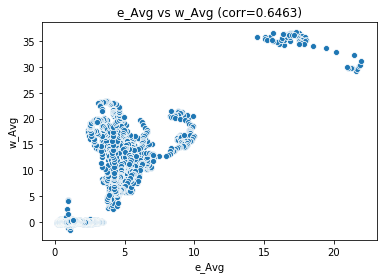

In [25]:
sns.scatterplot(x=df1["e_Avg"],y=df1["w_Avg"])
plt.title("e_Avg vs w_Avg (corr=0.6463)")

Text(0.5, 1.0, 'e_Avg vs rh_Avg (corr=0.7286)')

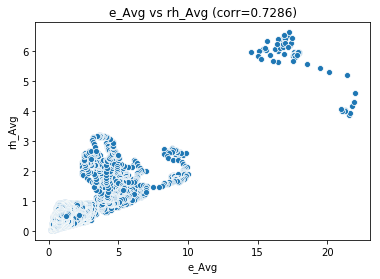

In [26]:
sns.scatterplot(x=df1["e_Avg"],y=df1["rh_Avg"])
plt.title("e_Avg vs rh_Avg (corr=0.7286)")

Text(0.5, 1.0, 'e_Avg vs h2o_hmp_Avg (corr=0.9991)')

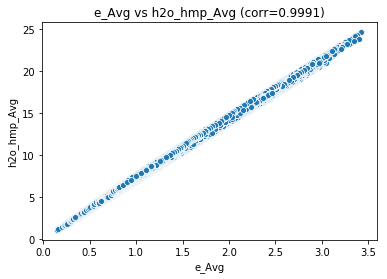

In [28]:
sns.scatterplot(x=df1["e_Avg"],y=df1["h2o_hmp_Avg"])
plt.title("e_Avg vs h2o_hmp_Avg (corr=0.9991)")

Text(0.5, 1.0, 'h2o_hmp_Avg vs N (corr=0.7685)')

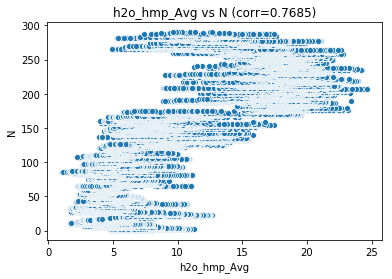

In [29]:
sns.scatterplot(x=df1["h2o_hmp_Avg"],y=df1["N"])
plt.title("h2o_hmp_Avg vs N (corr=0.7685)")

Text(0.5, 1.0, 'h2o_hmp_Avg vs e_Avg (corr=0.9991)')

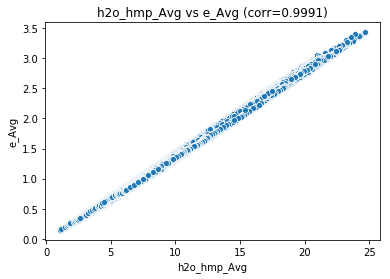

In [30]:
sns.scatterplot(x=df1["h2o_hmp_Avg"],y=df1["e_Avg"])
plt.title("h2o_hmp_Avg vs e_Avg (corr=0.9991)")